Importing Libraries

In [35]:
# Basic data analysis libraries
import pandas as pd        
import numpy as np         

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns            # For advanced visualizations



importing the data

In [36]:
data=pd.read_csv(r"C:\Users\Pavan Satya\Downloads\Hotel Bookings (1) (1) (1).csv")

Framing the Data

In [37]:
df=pd.DataFrame(data)

Data Shape

In [38]:
df.shape

(119390, 32)

Column names

In [39]:
df.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

First 5 rows of data

In [41]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Info of Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Null Value Count of Each Column

In [43]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Removing rows where children,company value is NULL

In [44]:
df.dropna(subset=['country'], inplace=True)
df.dropna(subset=['children'], inplace=True)
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16004
company         

Cleaning agent and company columns

In [45]:
df["agent"]=df["agent"].fillna(0)
df['agent'] = df['agent'].apply(lambda x: 1 if x != 0 else 0)
# as company is not required 
df.drop('company', axis=1, inplace=True)

checking duplicates

In [46]:
df.duplicated().sum()

np.int64(31978)

Removing duplicates

In [47]:
df.drop_duplicates(inplace=True)

Checking the datatype of columns

In [48]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Converting to integer datatype

In [49]:
df["hotel"] = df["hotel"].map({"Resort Hotel": 0, "City Hotel": 1})


month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)
df["children"]=df["children"].astype(int)

letter_mapping = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4,
    'E': 5, 'F': 6, 'G': 7, 'H': 8,
    'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16
}

df['assigned_room_type'] = df['assigned_room_type'].map(letter_mapping)
df['reserved_room_type'] = df['reserved_room_type'].map(letter_mapping)

deposit_mapping = {
    'No Deposit': 0,
    'Refundable': 1,
    'Non Refund': 2
}
df['deposit_type'] = df['deposit_type'].map(deposit_mapping)

status_mapping = {
    'Check-Out': 0,   # Guest completed their stay
    'Canceled': 1,    # Booking was canceled
    'No-Show': 2      # Guest didn't arrive and didn’t cancel
}
df['reservation_status'] = df['reservation_status'].map(status_mapping)

customer_type_mapping = {
    'Transient': 0,
    'Contract': 1,
    'Transient-Party': 2,
    'Group': 3
}
df['customer_type'] = df['customer_type'].map(customer_type_mapping)

distribution_channel_mapping = {
    'Direct': 0,
    'Corporate': 1,
    'TA/TO': 2,
    'GDS': 3,
    'Undefined': 4
}
df['distribution_channel'] = df['distribution_channel'].map(distribution_channel_mapping)


meal_mapping = {
    'SC': 0,          # No meals (Self Catering)
    'BB': 1,          # Bed and Breakfast
    'HB': 2,          # Half Board
    'FB': 3,          # Full Board
    'Undefined': 4    # Not specified
}
df['meal'] = df['meal'].map(meal_mapping)

market_segment_mapping = {
    'Direct': 0,
    'Corporate': 1,
    'Online TA': 2,
    'Offline TA/TO': 3,
    'Complementary': 4,
    'Groups': 5,
    'Aviation': 6
}
df['market_segment'] = df['market_segment'].map(market_segment_mapping)



converting into date

In [50]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86920 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86920 non-null  int64         
 1   is_canceled                     86920 non-null  int64         
 2   lead_time                       86920 non-null  int64         
 3   arrival_date_year               86920 non-null  int64         
 4   arrival_date_month              86920 non-null  int64         
 5   arrival_date_week_number        86920 non-null  int64         
 6   arrival_date_day_of_month       86920 non-null  int64         
 7   stays_in_weekend_nights         86920 non-null  int64         
 8   stays_in_week_nights            86920 non-null  int64         
 9   adults                          86920 non-null  int64         
 10  children                        86920 non-null  int64         
 11  babies

1.Curious about the prime time to secure a hotel room? 


In [52]:
import calendar

# Convert numeric month to full month name
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: calendar.month_name[int(x)])


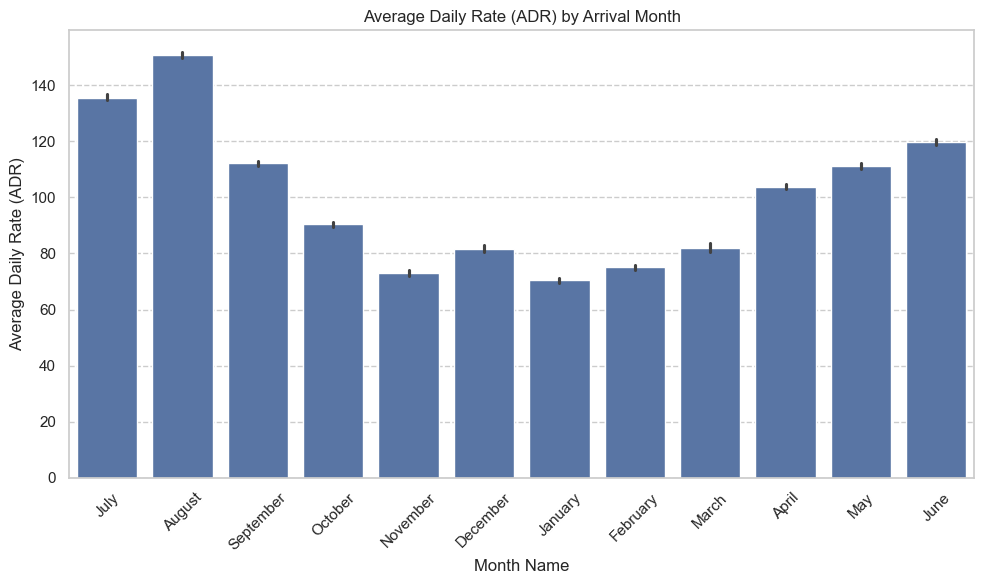

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='arrival_date_month', y='adr', data=df)
plt.title('Average Daily Rate (ADR) by Arrival Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xlabel('Month Name')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

Hotel rates peak in August and July, while January to March offer the lowest prices.
January-March is best time to secure a Room

2.What’s the Ideal Length of Stay for the Best Rates?

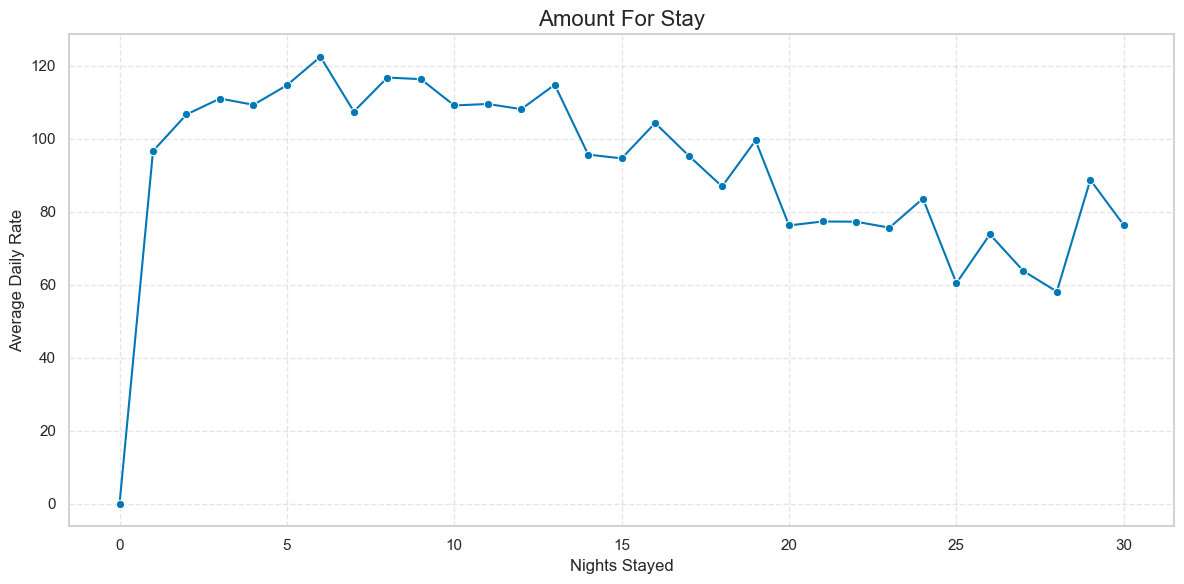

In [53]:
# Prepare data
stay_adr = df[df['adr'] < 500].copy()
stay_adr['total_stay'] = stay_adr['stays_in_weekend_nights'] + stay_adr['stays_in_week_nights']
stay_avg = stay_adr.groupby('total_stay')['adr'].mean().reset_index()
stay_avg = stay_avg[stay_avg['total_stay'] <= 30]

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=stay_avg, x='total_stay', y='adr', marker='o', color="#0077b6")

plt.title("Amount For Stay", fontsize=16)
plt.xlabel("Nights Stayed")
plt.ylabel("Average Daily Rate")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The "ideal" length of stay for better rates is longer than a week. This suggests the hotel incentivizes longer bookings with discounted per-night rates, a common strategy to maximize occupancy and reduce the operational costs associated with room turnover.

3. Intrigued by the factors that might lead to a surge in special
requests for a hotel? 

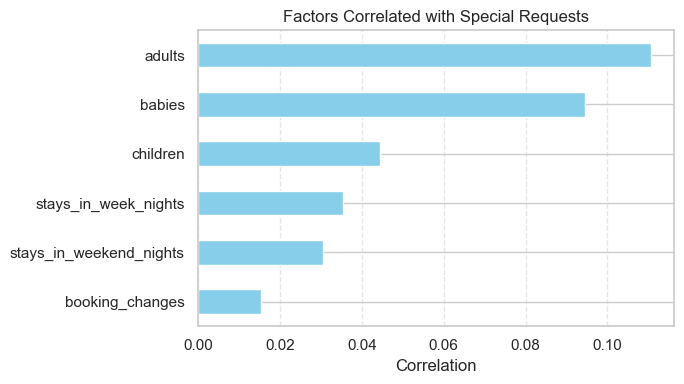

In [54]:
# Correlation with secial requests
cols = ['total_of_special_requests', 'adults', 'babies', 'children',
        'stays_in_week_nights', 'stays_in_weekend_nights', 'booking_changes']
corr = df[cols].corr()['total_of_special_requests'].sort_values(ascending=True)

# Horizontal barplot
corr.drop('total_of_special_requests').plot(kind='barh', color='skyblue', figsize=(7,4))
plt.title('Factors Correlated with Special Requests')
plt.xlabel('Correlation')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Special requests are most likely to surge from family bookings (especially with babies) and from guests who have previously modified their reservation. This allows staff to anticipate needs and allocate resources more effectively.

4.When Are Bookings Typically Made?

Text(0.5, 1.0, 'Booking Lead Time Distribution')

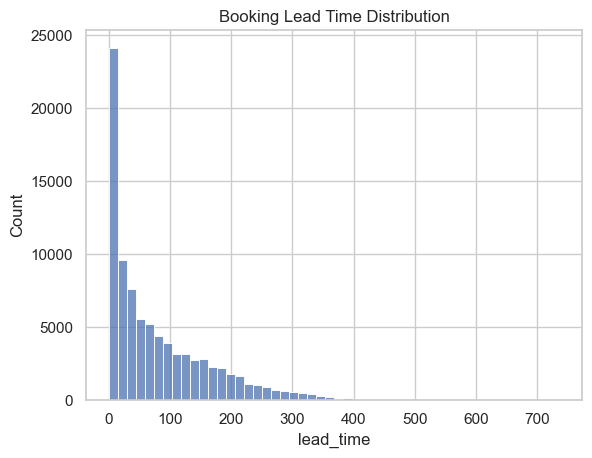

In [55]:
sns.histplot(df['lead_time'], bins=50)
plt.title("Booking Lead Time Distribution")


We analyzed the `lead_time` column to understand how far in advance people book hotels.

**Insight:**  
Most bookings happen within **0–50 days**, especially around **0–10 days** before arrival. This shows many bookings are last-minute.


5.How does the length of stay correlate with daily rates?


In [56]:
# Add a column for total stay length
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# Group by stay length and calculate average ADR
stay_vs_adr = df.groupby('total_stay')['adr'].mean().reset_index()


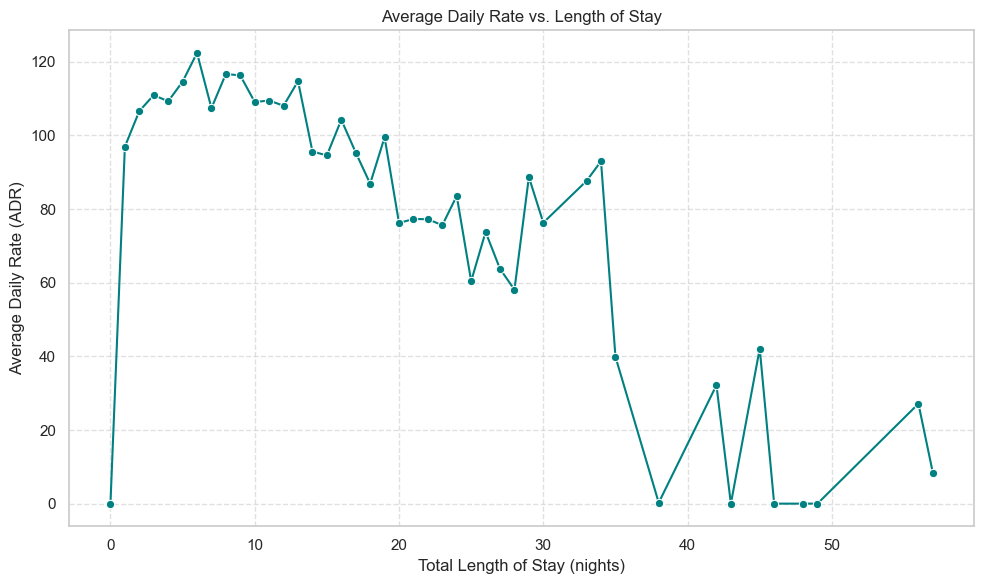

In [57]:
plt.figure(figsize=(10,6))
sns.lineplot(data=stay_vs_adr, x='total_stay', y='adr', marker='o', color='teal')
plt.title('Average Daily Rate vs. Length of Stay')
plt.xlabel('Total Length of Stay (nights)')
plt.ylabel('Average Daily Rate (ADR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 🛏️ ADR vs. Length of Stay  
Guests staying longer than 5–7 nights tend to pay **less per day**, indicating bulk stay discounts.  
Shorter stays often have **higher daily rates**, especially for 1–2 night bookings.


6. What demographic factors influence booking patterns?


<Axes: >

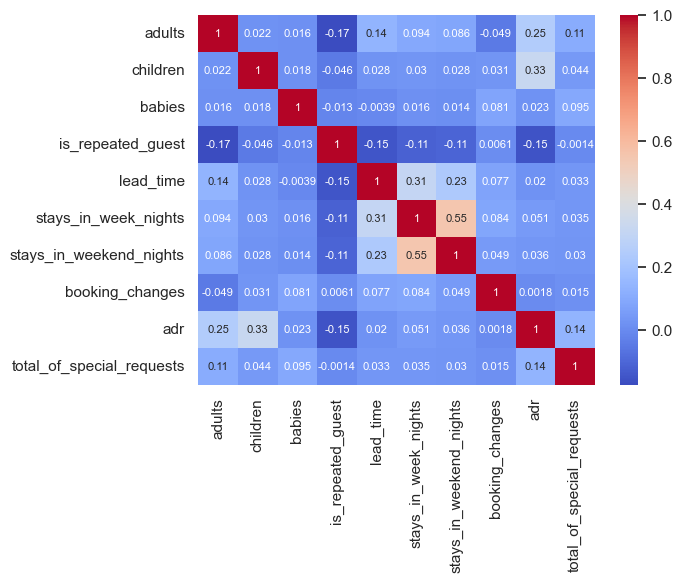

In [63]:
cols = ['adults', 'children', 'babies', 'is_repeated_guest',
        'lead_time', 'stays_in_week_nights', 'stays_in_weekend_nights',
        'booking_changes', 'adr', 'total_of_special_requests']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',annot_kws={"size": 8})


### 🔗 Correlation Among Special Request Factors  
This heatmap shows how group size and stay duration relate to the number of special requests.  
`Adults` and `babies` have the strongest (but weak) correlations with special request counts.
